### Trabajo Final: Caso cielentes de Telecomunicaciones

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
pwd

'd:\\Laboratorio Final\\Caso Fuga de Clientes en Telecomunicaciones'

In [3]:
df=pd.read_csv('telecom_customer_churn.csv',sep = ";",encoding = 'utf8')
df.shape

(7043, 21)

In [4]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


In [5]:
df.isna().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
customerID           0
dtype: int64

<Axes: >

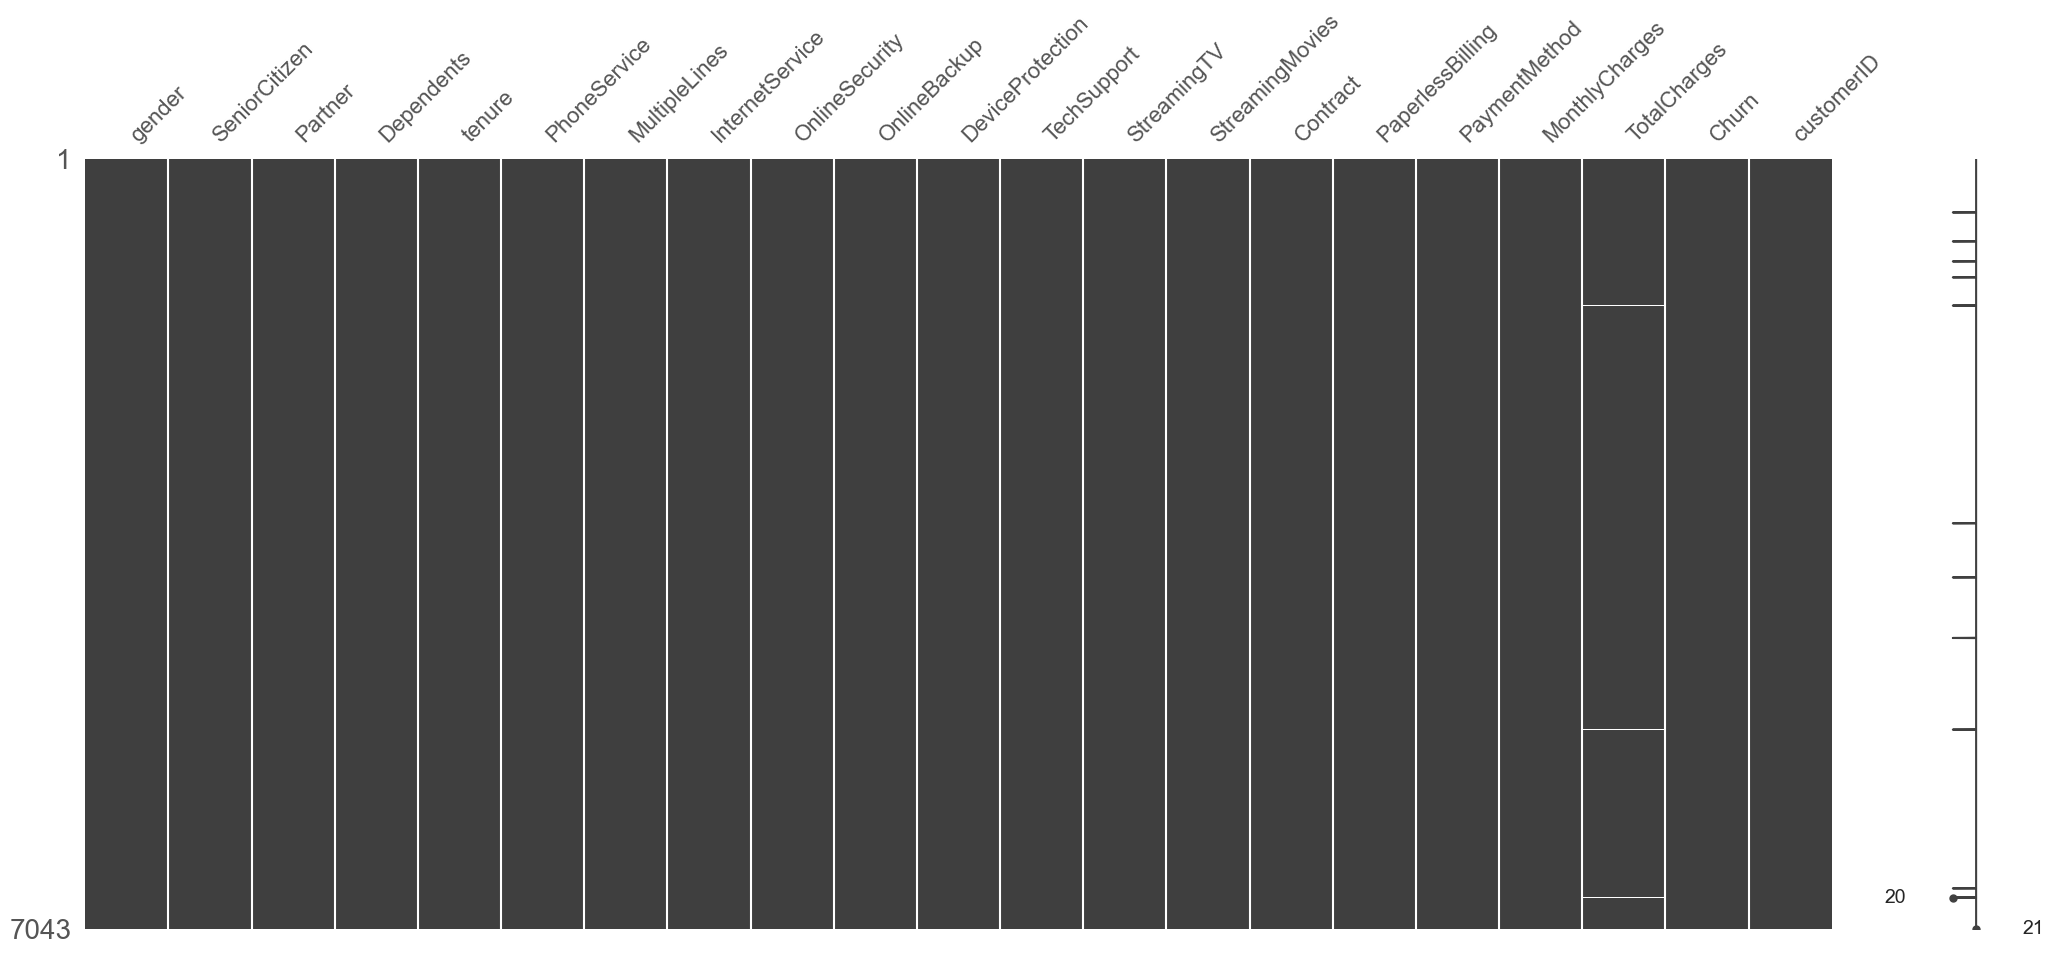

In [6]:
import missingno as msno
msno.matrix(df)


In [7]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

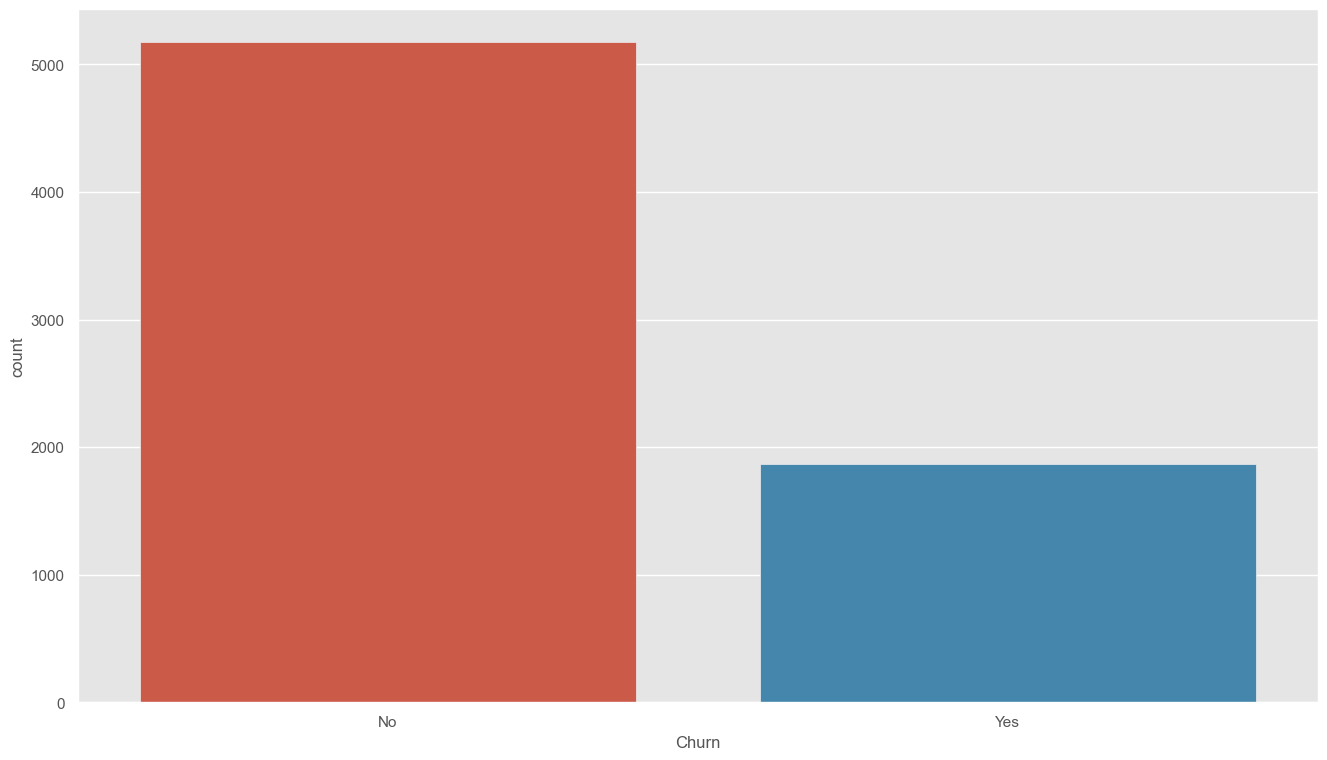

In [8]:
sns.countplot(x='Churn',data=df)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


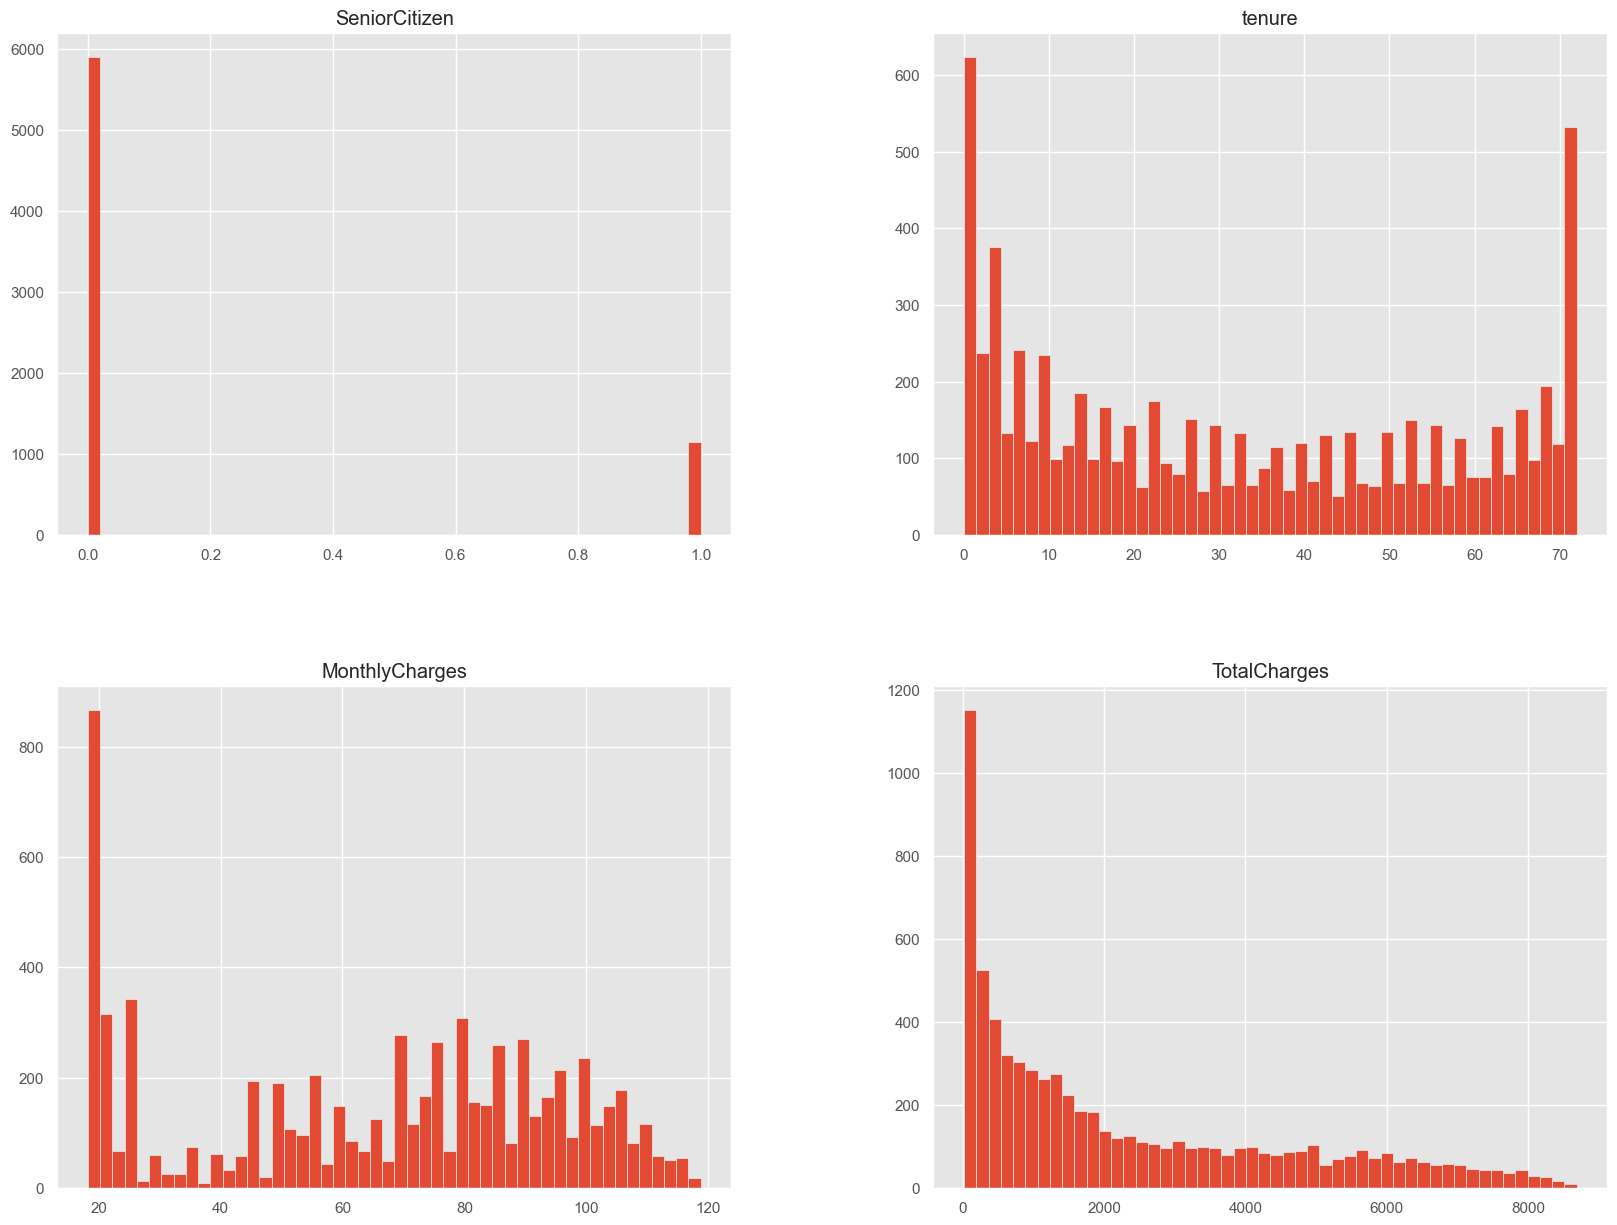

In [10]:
Var=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df[Var].hist(bins=50 ,figsize=(20,15))
plt.show()

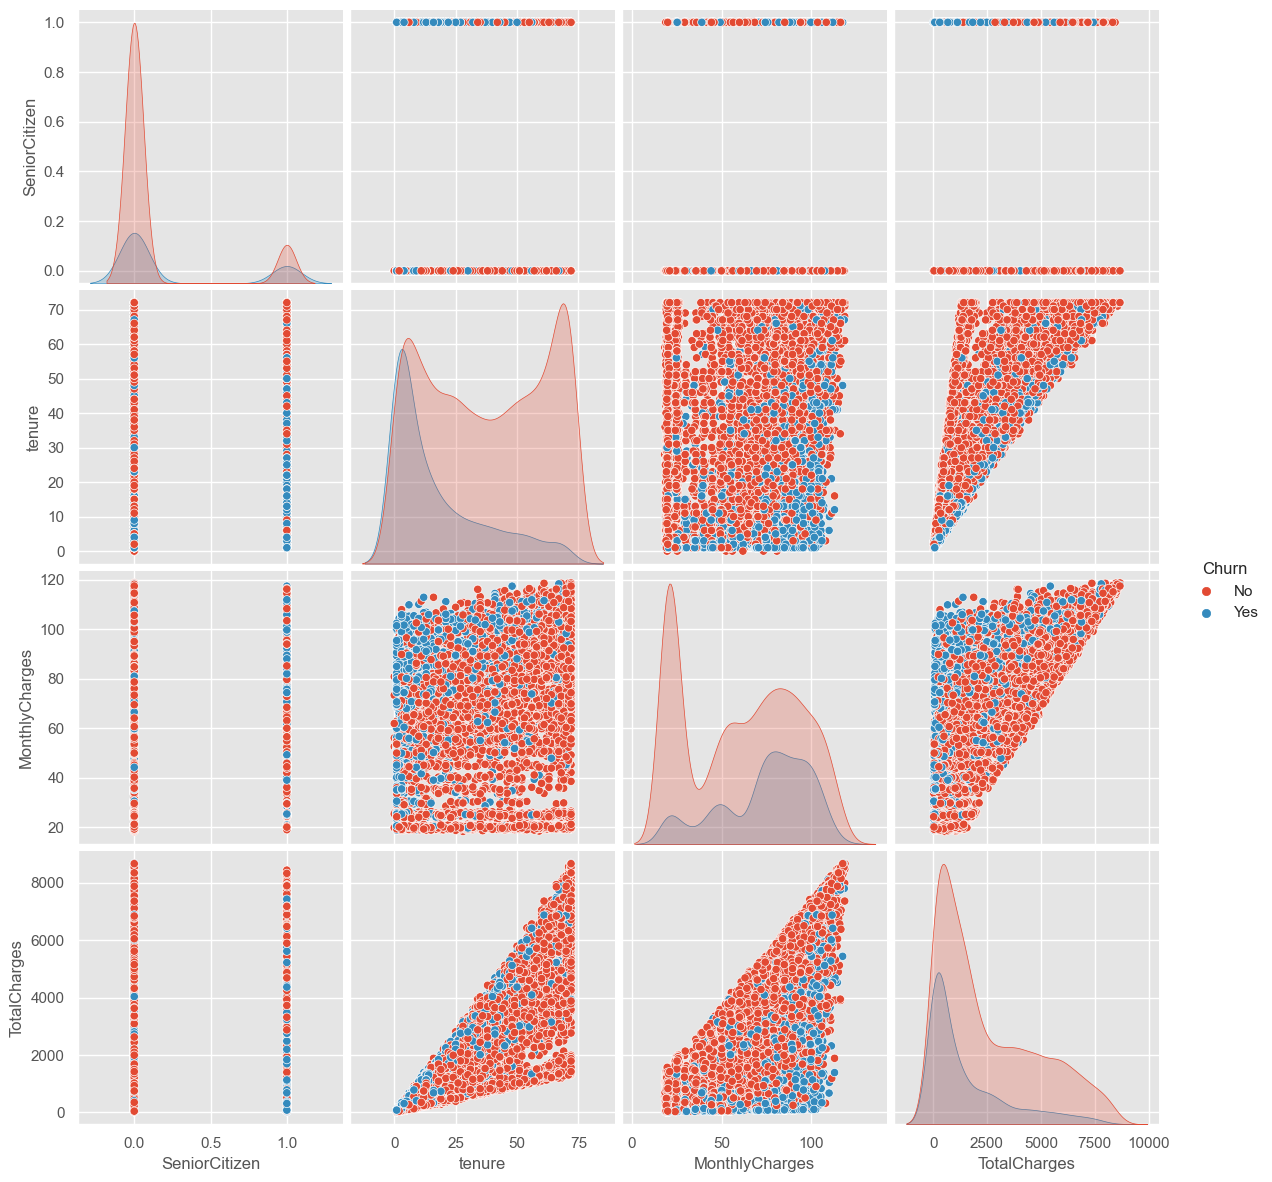

In [11]:
Variables = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df[Variables], height=3, diag_kind = 'kde', hue='Churn')

<Axes: >

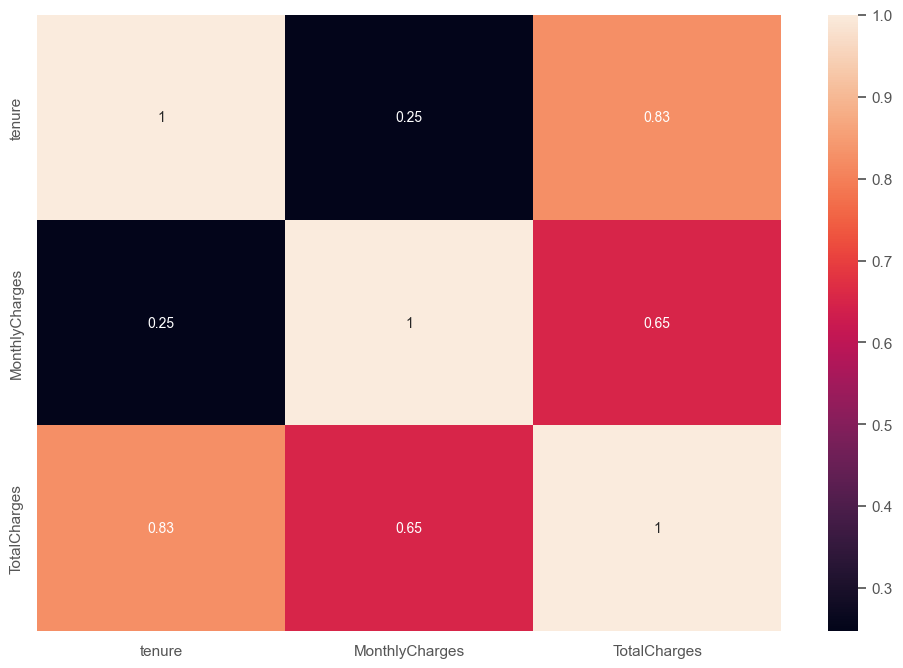

In [12]:
corr = df[['tenure','MonthlyCharges','TotalCharges']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [13]:
categorias = df.select_dtypes(include=['object'])
categorias.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
customerID          object
dtype: object

<bound method Series.sort_index of gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64>

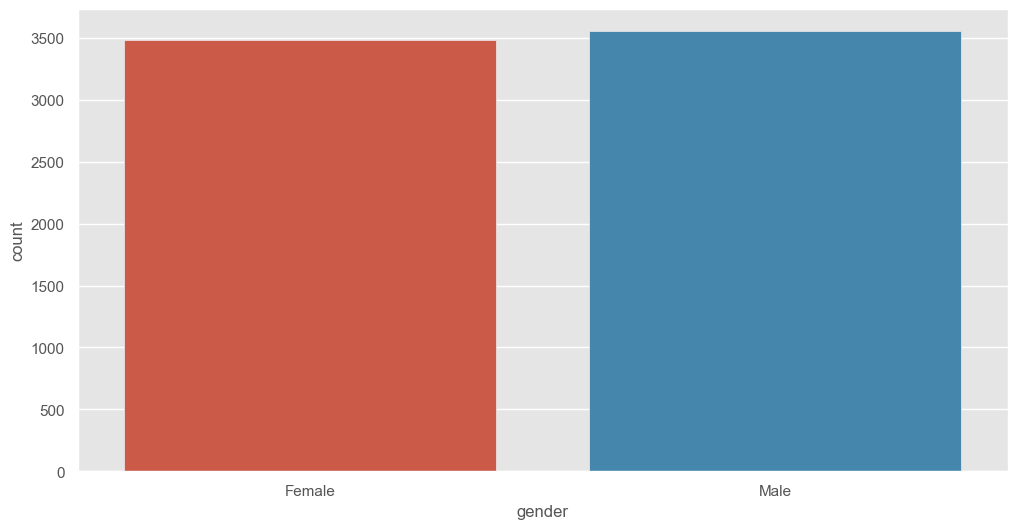

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = "gender")
df['gender'].value_counts(1).sort_index

<Axes: xlabel='Churn', ylabel='count'>

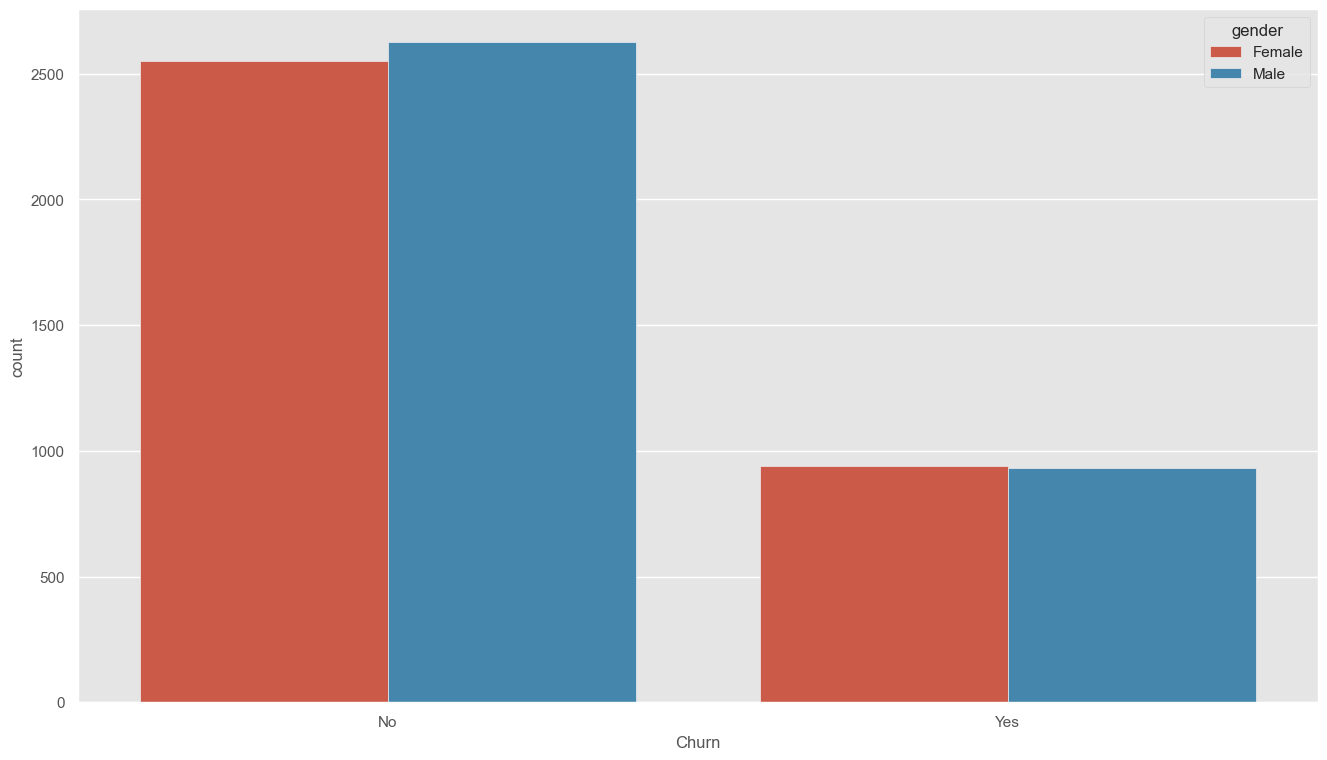

In [16]:
sns.countplot(x='Churn',data=df,hue='gender')
